<a href="https://colab.research.google.com/github/mjohnsonperimeter/cosmology_2019/blob/master/random_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt

Fourier space from real space

In [0]:
L = 10
N = 100000
dx = L/N
x = np.linspace(0,L,N)

mu = 0.
p_sigma = 1
p_data = np.random.normal(mu, p_sigma,N)

f_data = np.fft.rfft(p_data)
f = np.fft.rfftfreq(p_data.size,dx)
k=2.*np.pi*f
f_sigma = p_sigma*np.sqrt(N/2.)

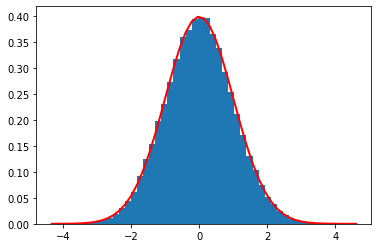

In [43]:
count, bins, ignored = plt.hist(p_data,50,density=True)
plt.plot(bins, 1/(p_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * p_sigma**2) ),linewidth=2, color='r')

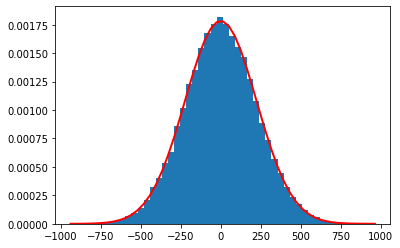

In [44]:
count, bins, ignored = plt.hist(f_data.real,50,density=True)
plt.plot(bins, 1/(f_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * f_sigma**2) ),linewidth=2, color='r')

Real space from fourier space

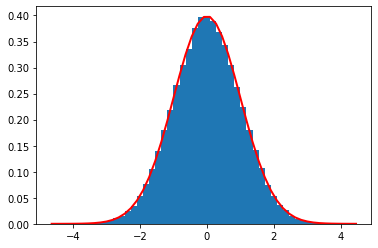

In [45]:
L = 10
N = 100000
dx = L/N
x = np.linspace(0,L,N)

f_mu = 0.
f_sigma = np.sqrt(N)
f_data_real = np.random.normal(f_mu, f_sigma,N)
f_data_imag = np.random.normal(f_mu, f_sigma,N)

p_data = np.fft.irfft(f_data_real + 1j*f_data_imag)

count, bins, ignored = plt.hist(p_data,50,density=True)
plt.plot(bins, 1/(p_sigma * np.sqrt(2 * np.pi))*np.exp( - (bins)**2 / (2 * p_sigma**2) ),linewidth=2, color='r')

Band powers

In [0]:
from scipy import stats
nbands = 1000
power=f_data.real**2 + f_data.imag**2
bin_means, bin_edges, binnumber=scipy.stats.binned_statistic(k,power,'mean',nbands)

(50000.0, 200000.0)

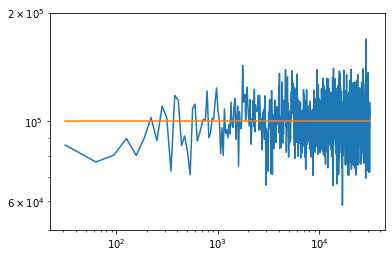

In [51]:
plt.loglog(bin_edges[1:],bin_means)
plt.loglog(bin_edges[1:],(f_sigma**2)*np.ones(bin_means.shape))
plt.ylim(5e4,2e5)